## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on=["Mouse ID"], how="left")

# Display the data table for preview
display(combined_df)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
combined_df.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [3]:
#combined_df.describe()

In [4]:
#combined_df.info()

In [5]:
# Checking the number of mice.
mice_count=combined_df['Mouse ID'].value_counts()
len(mice_count)


249

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_ids= combined_df.loc[combined_df.duplicated(keep='first'), :]
duplicated_ids

# duplicated_ids = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
# duplicated_ids

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [16]:
# Optional: Get all the data for the duplicate mouse ID. 
ids = combined_df.loc[combined_df["Mouse ID"] == "g989"]
#len(ids)
ids


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [22]:
# clean_df  = combined_df.drop_duplicates( keep="last")
clean_df = combined_df[combined_df['Mouse ID'].isin(duplicated_ids)==False]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [23]:
# Checking the number of mice in the clean DataFrame.
len(clean_df["Mouse ID"].unique())

249

In [21]:
#veryfy if the duplicates have been removed
clean_df.count()

Mouse ID              1892
Drug Regimen          1892
Sex                   1892
Age_months            1892
Weight (g)            1892
Timepoint             1892
Tumor Volume (mm3)    1892
Metastatic Sites      1892
dtype: int64

## Summary Statistics

In [24]:
display(clean_df)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [32]:
#Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
average=clean_df.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
#average.round(3)
median=clean_df.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
#median.round(3)
variance=clean_df.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
#variance.round(3)
std_dev=clean_df.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
#std_dev.round(3)
sems=clean_df.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]
#sems.round(3)

summary_table = pd.DataFrame({"Mean Tumor Volume":average,
                              "Median Tumor Volume":median,
                              "Tumor Volume Variance":variance,
                              "Tumor Volume Std. Dev.":std_dev,
                              "Tumor Volume Std. Err.":sems})
summary_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [35]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drugs_regimen = pd.DataFrame(pd.value_counts(clean_df["Drug Regimen"]))
drugs_regimen


,Drug Regimen
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Stelasyn,181
Placebo,181
Ceftamin,178
Infubinol,178
Propriva,161


## Bar and Pie Charts

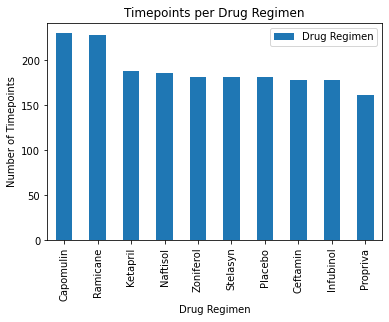

<Figure size 432x288 with 0 Axes>

In [36]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

drugs_regimen.plot(kind="bar")
plt.title("Timepoints per Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.xlabel("Drug Regimen")
plt.show()
plt.tight_layout()

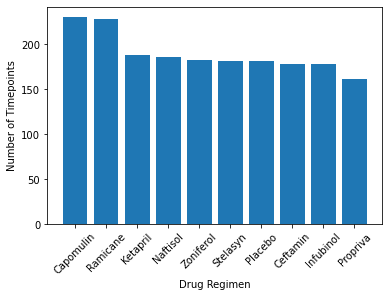

In [38]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x_axis = clean_df["Drug Regimen"].value_counts().index
y_axis = clean_df["Drug Regimen"].value_counts()
plt.bar(x_axis, y_axis)
plt.xticks(rotation=45)
plt.ylabel("Number of Timepoints")
plt.xlabel("Drug Regimen")
plt.show()

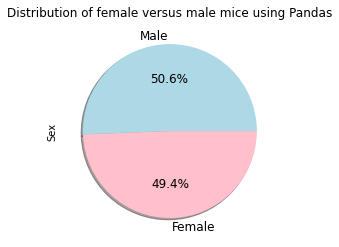

In [42]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_count_pd = clean_df.Sex.value_counts()
gender_count_pd.plot(kind="pie",autopct='%1.1f%%',shadow=True, fontsize=12, colors =["lightblue","pink"],legend =False, title="Distribution of female versus male mice using Pandas")
plt.show()


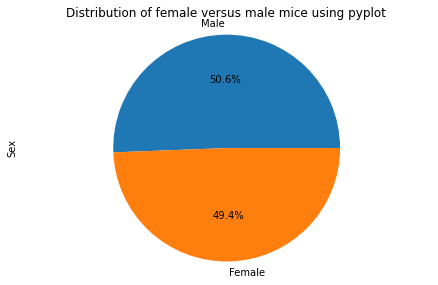

In [48]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_count = pd.value_counts(clean_df['Sex'])
gender_count_plt = gender_count.plot(kind="pie", y="sex", autopct='%1.1f%%')
gender_count_plt.set_ylabel("Sex")
plt.title("Distribution of female versus male mice using pyplot")
plt.tight_layout()
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Start by getting the last (greatest) timepoint for each mouse
timepoint_df = filtered_df.sort_values("Timepoint", ascending = False)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
